## CIF Quick Start Guide (Examples)

In [13]:
import matplotlib.pyplot as plt
import os

os.chdir('/Users/patrick_bloniasz/filtered_point_process')

## Package structure

In [14]:
ls -R

Notebooks/              environment.yml         tests/
README.md               filtered_point_process/

./Notebooks:
Guide_QuickStart_CIF.ipynb     ampa_kernel_plot.png
Guide_QuickStart_FPP.ipynb     ampa_kernel_plot.svg
Guide_QuickStart_PP.ipynb      gaba_kernel_plot.png
QuickGuide_enitre_model.ipynb  gaba_kernel_plot.svg

./filtered_point_process:
FPP.py            __init__.py       config/           pp.py
ParamSetter.py    __pycache__/      filters.py        utils.py
PointProcess.py   cif.py            helpers.py        visualization.py

./filtered_point_process/__pycache__:
FPP.cpython-310.pyc            filters.cpython-310.pyc
ParamSetter.cpython-310.pyc    helpers.cpython-310.pyc
PointProcess.cpython-310.pyc   pp.cpython-310.pyc
__init__.cpython-310.pyc       utils.cpython-310.pyc
cif.cpython-310.pyc            visualization.cpython-310.pyc

./filtered_point_process/config:
AMPA_filter.json          GABA_filter.json          cox_gaussian.json
Action_Potential.json     cox_ar1.jso

## Helpful User Warnings

In [15]:
from filtered_point_process.PointProcess import PointProcessModel

model = PointProcessModel(seed=45)

Users will be made aware if they are not providing a config_file or user-defined parameters. There is a default set of parameters to prevent the package from breaking during a 'quick start' useage of the package. These default parameters can be seen by looking at model._default_params(). As it can be seen below the default parameters belongs to a Cox process or doubly stochastic point process with a gaussian CIF defined in the frequency domain. While interacting with the package allows you to specify the point_process type and CIF type directly as shown above, the parameters only call for either specifying the CIF (because it will be a Cox process by default due to the current package structure) or explicitly call out the "Homogeneous_Poisson" in the method section. We've developed a .json file example under the config section of the package that can be loaded in for you for every current point process model. As additional features are added, the config files will be updated. 

In [16]:
model._default_params()

{'peak_height': 50000,
 'center_frequency': 1,
 'peak_width': 0.01,
 'fs': 10000,
 'T': 3,
 'Nsims': 1,
 'method': 'gaussian',
 'lambda_0': [100]}

## No config file

In [17]:
model.simulate_cif()  # Simulate the CIF model
print("CIF time domain time axis:", model.cif_time_axis)
print("CIF time domain intensity:", model.cif_realization)
print("CIF frequency domain frequencies:", model.cif_frequencies)
print("CIF frequency domain PSD:", model.cif_PSD)

CIF time domain time axis: [0.0000e+00 1.0000e-04 2.0000e-04 ... 2.9997e+00 2.9998e+00 2.9999e+00]
CIF time domain intensity: [52.43609408+3.14018492e-15j 52.4283047 -3.92523119e-15j
 52.42053411-1.57009246e-15j ... 71.11625657+7.85048642e-15j
 71.10834738+6.47658354e-15j 71.10044958+2.55132850e-15j]
CIF frequency domain frequencies: [0.         0.00305176 0.00610352 ... 0.00915527 0.00610352 0.00305176]
CIF frequency domain PSD: [0. 0. 0. ... 0. 0. 0.]


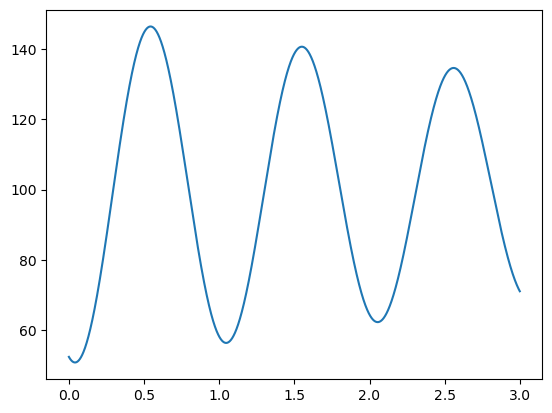

In [18]:
plt.plot(model.cif_time_axis, model.cif_realization)


(0.0, 2.0)

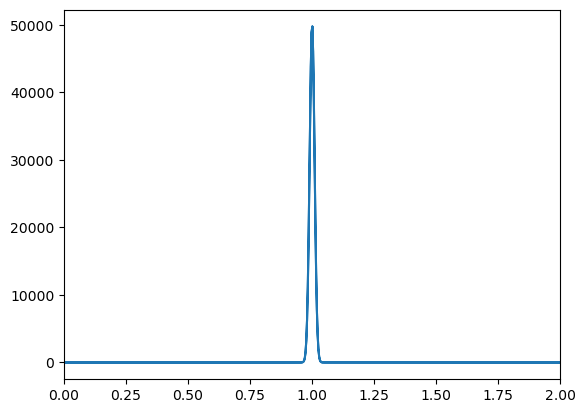

In [19]:
plt.plot(model.cif_frequencies, model.cif_PSD)
plt.xlim(0,2)

## Config File

In [20]:
params_config = 'cox_ar1.json'

model = PointProcessModel(config_file= params_config, seed=45)
model.simulate_cif()  # Simulate the CIF model
print("CIF time domain time axis:", model.cif_time_axis)
print("CIF time domain intensity:", model.cif_realization)
print("CIF frequency domain frequencies:", model.cif_frequencies)
print("CIF frequency domain PSD:", model.cif_PSD)

Configuration file /Users/patrick_bloniasz/filtered_point_process/filtered_point_process/config/cox_ar1.json successfully loaded.
CIF time domain time axis: [0.0000e+00 1.0000e-04 2.0000e-04 ... 2.9997e+00 2.9998e+00 2.9999e+00]
CIF time domain intensity: [75.         75.3984745  75.4666183  ... 75.53131862 75.81107237
 75.81470003]
CIF frequency domain frequencies: [0.         0.00305176 0.00610352 ... 0.00915527 0.00610352 0.00305176]
CIF frequency domain PSD: [0.16 0.16 0.16 ... 0.16 0.16 0.16]


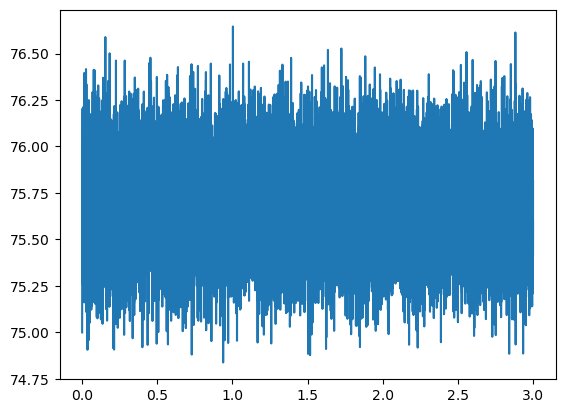

In [21]:
plt.plot(model.cif_time_axis, model.cif_realization.squeeze())


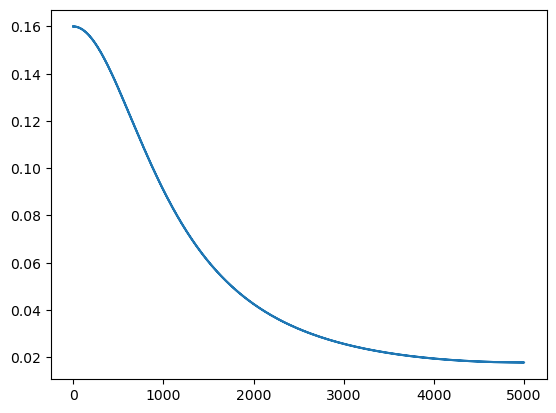

In [22]:
plt.plot(model.cif_frequencies, model.cif_PSD)


## User defined params in-line

In [23]:
params = {'method': 'AR(1)',
 'phi_1': 0.3,
 'white_noise_variance': 0.6,
 'fs': 10000,
 'T': 10,
 'Nsims': 1,
 'lambda_0': [75]
}

In [24]:
model = PointProcessModel(params= params, seed=45)
model.simulate_cif()  # Simulate the CIF model
print("CIF time domain time axis:", model.cif_time_axis)
print("CIF time domain intensity:", model.cif_realization)
print("CIF frequency domain frequencies:", model.cif_frequencies)
print("CIF frequency domain PSD:", model.cif_PSD)

CIF time domain time axis: [0.0000e+00 1.0000e-04 2.0000e-04 ... 9.9997e+00 9.9998e+00 9.9999e+00]
CIF time domain intensity: [75.         76.47703192 76.52686114 ... 75.7401526  76.64553696
 76.54377483]
CIF frequency domain frequencies: [0.         0.00076294 0.00152588 ... 0.00228882 0.00152588 0.00076294]
CIF frequency domain PSD: [0.73469388 0.73469388 0.73469388 ... 0.73469388 0.73469388 0.73469388]


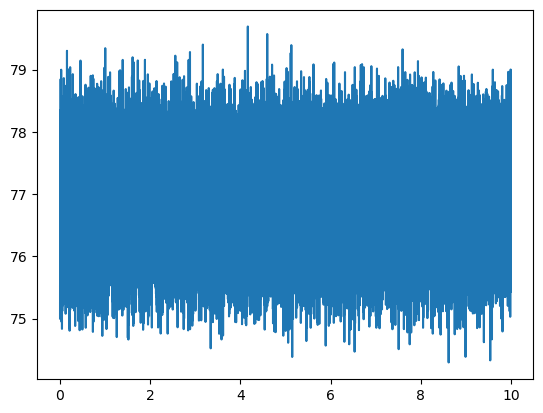

In [25]:
plt.plot(model.cif_time_axis, model.cif_realization)


Note: This should be centered higher to not cut off values, double check algorithm

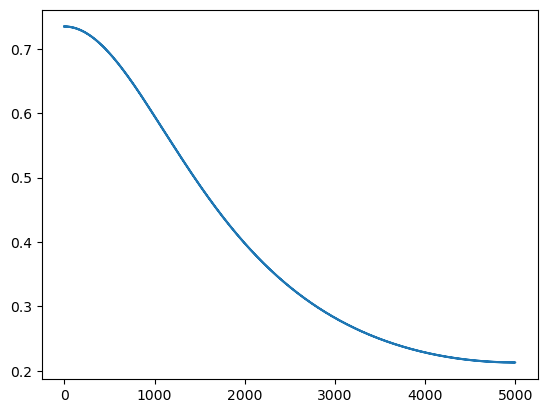

In [26]:
plt.plot(model.cif_frequencies, model.cif_PSD)


## Accessing information

While there are helper functions that allow the user to quickly find what they are looking for (e.g., model.cif_PSD), the package is logically structured to keep track of what you are looking to access. All relevant information can be accessed directly as seen in the following examples using OOP. 

In [27]:
print(model.cif.frequency_domain.frequencies)
print(model.cif.frequency_domain.PSD)
print(model.cif.time_domain.time_axis)
print(model.cif.time_domain.intensity_realization)

[0.         0.00076294 0.00152588 ... 0.00228882 0.00152588 0.00076294]
[0.73469388 0.73469388 0.73469388 ... 0.73469388 0.73469388 0.73469388]
[0.0000e+00 1.0000e-04 2.0000e-04 ... 9.9997e+00 9.9998e+00 9.9999e+00]
[[75.         76.47703192 76.52686114 ... 75.7401526  76.64553696
  76.54377483]]


In [28]:
model.global_seed

45

## Ensuring all methods work (i.e., check every config file)

Configuration file /Users/patrick_bloniasz/filtered_point_process/filtered_point_process/config/cox_ar1.json successfully loaded.
CIF time domain time axis: [0.0000e+00 1.0000e-04 2.0000e-04 ... 2.9997e+00 2.9998e+00 2.9999e+00]
CIF time domain intensity: [75.         75.3984745  75.4666183  ... 75.53131862 75.81107237
 75.81470003]
CIF frequency domain frequencies: [0.         0.00305176 0.00610352 ... 0.00915527 0.00610352 0.00305176]
CIF frequency domain PSD: [0.16 0.16 0.16 ... 0.16 0.16 0.16]


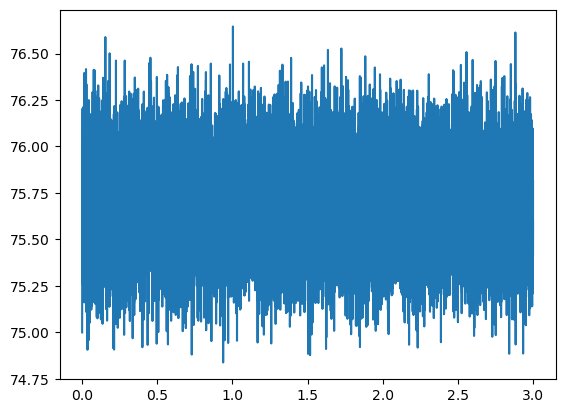

In [29]:
params_config = 'cox_ar1.json'

model = PointProcessModel(config_file= params_config, seed=45)
model.simulate_cif()  # Simulate the CIF model
print("CIF time domain time axis:", model.cif_time_axis)
print("CIF time domain intensity:", model.cif_realization)
print("CIF frequency domain frequencies:", model.cif_frequencies)
print("CIF frequency domain PSD:", model.cif_PSD)

plt.plot(model.cif_time_axis, model.cif_realization.squeeze())



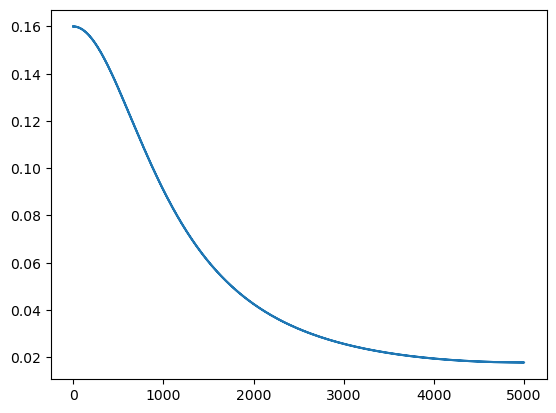

In [30]:
plt.plot(model.cif_frequencies, model.cif_PSD)


Configuration file /Users/patrick_bloniasz/filtered_point_process/filtered_point_process/config/cox_gaussian.json successfully loaded.
CIF time domain time axis: [0.0000e+00 1.0000e-04 2.0000e-04 ... 2.9997e+00 2.9998e+00 2.9999e+00]
CIF time domain intensity: [ 77.39184481  77.37844794  77.36506403 ... 105.22150396 105.25446666
 105.28742691]
CIF frequency domain frequencies: [0.         0.00305176 0.00610352 ... 0.00915527 0.00610352 0.00305176]
CIF frequency domain PSD: [0.00000000e+00 2.61583188e-19 3.54437189e-19 ... 4.79804450e-19
 3.54437189e-19 2.61583188e-19]


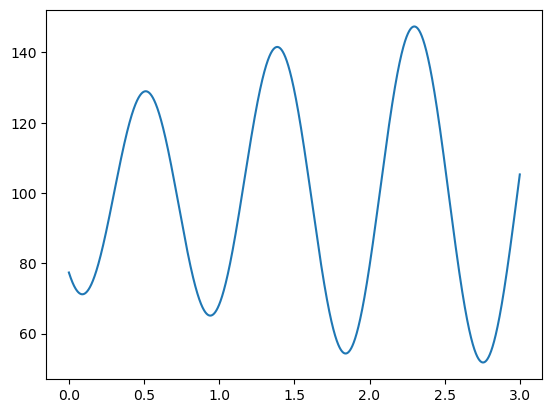

In [31]:
params_config = 'cox_gaussian.json'

model = PointProcessModel(config_file= params_config, seed=45)
model.simulate_cif()  # Simulate the CIF model
print("CIF time domain time axis:", model.cif_time_axis)
print("CIF time domain intensity:", model.cif_realization)
print("CIF frequency domain frequencies:", model.cif_frequencies)
print("CIF frequency domain PSD:", model.cif_PSD)

plt.plot(model.cif_time_axis, model.cif_realization.squeeze())



(0.0, 2.0)

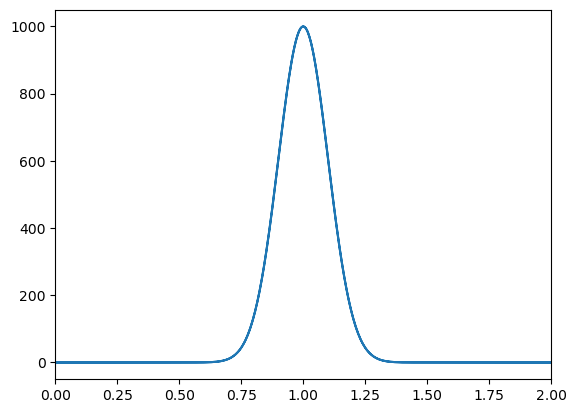

In [32]:
plt.plot(model.cif_frequencies, model.cif_PSD)
plt.xlim(0, 2)


Configuration file /Users/patrick_bloniasz/filtered_point_process/filtered_point_process/config/homogeneous_poisson.json successfully loaded.
CIF time domain time axis: [0.0000e+00 1.0000e-04 2.0000e-04 ... 2.9997e+00 2.9998e+00 2.9999e+00]
CIF time domain intensity: [75. 75. 75. ... 75. 75. 75.]
CIF frequency domain frequencies: [0.         0.00305176 0.00610352 ... 0.00915527 0.00610352 0.00305176]
CIF frequency domain PSD: [0. 0. 0. ... 0. 0. 0.]


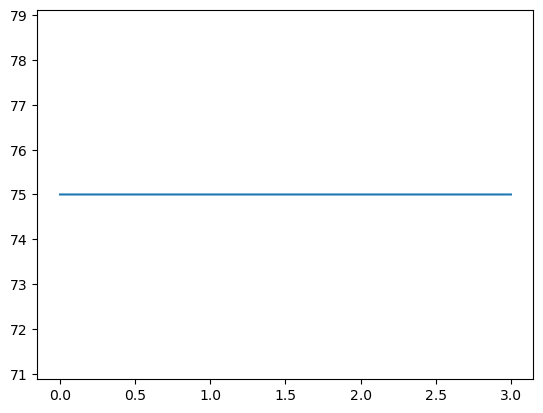

In [33]:
params_config = 'homogeneous_poisson.json'

model = PointProcessModel(config_file= params_config, seed=45)
model.simulate_cif()  # Simulate the CIF model
print("CIF time domain time axis:", model.cif_time_axis)
print("CIF time domain intensity:", model.cif_realization)
print("CIF frequency domain frequencies:", model.cif_frequencies)
print("CIF frequency domain PSD:", model.cif_PSD)

plt.plot(model.cif_time_axis, model.cif_realization.squeeze())



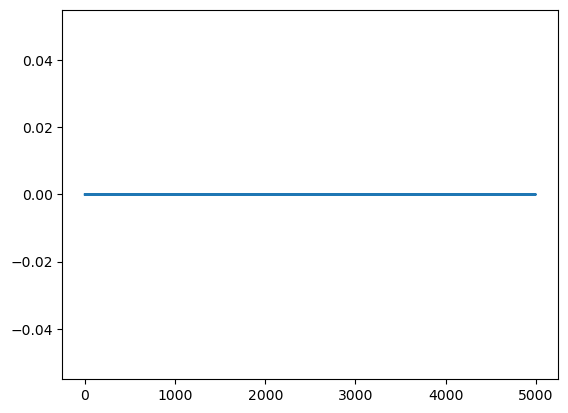

In [34]:
plt.plot(model.cif_frequencies, model.cif_PSD)

